In [1]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_circle(points=False, color_func=lambda x,y:(1,0,0) if (x**2+y**2)**(1/2) <=1 else (0,0,1,0.5)):
    circle  = plt.Circle((0,0), 1, fill=False, color="blue")
    fig, ax = plt.subplots()
    ax.add_artist(circle)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1, 1)
    if points:
        colors = [color_func(x,y) for x,y in points]
        plt.scatter(*zip(*points_list), color=colors)
    plt.show()

The Monte Carlo method works by using random points to estimate ratios and values, the most basic example, shown here, is to calculate the value of $\pi$ by comparing the ratio of points in a circle with ones in the inscribed square.
Obs.: Here we use a rectangle, but the principle is the same

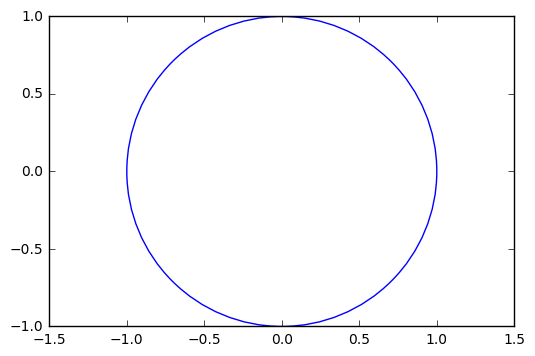

In [3]:
#First, lets plot a circle, centered arround 0 with a radius of 1
plot_circle()

We know the area of the circle is $\pi r^2$,if we sample a random point in the square, since they are all equally probable, we know the chance of it belonging inside the circle is the area of the circle divided by the area of the rectangle $P_{circle} = \dfrac{\pi r^2}{A_{rectangle}}$, we can then calculate $\pi = \dfrac{P_{circle} A_{rectangle}}{r^2}$ where $P_{circle}$ is the probability a point is inside the circle.

In [4]:
#Let's define a function for aproximating pi with a given number of points
def monte_carlo_pi(points, return_points=False):
    inside = 0
    point_list = []
    for i in range(points):
        x,y = (random.uniform(-1.5,1.5), random.uniform(-1,1))
        if (x**2+y**2)**(1/2) <= 1:
            inside += 1
        if return_points:
            point_list.append((x,y))
    #The area of our rectangle is 6, since it goes from -1.5 to 1.5 and -1 to 1
    pi = (inside/points) * (3*2)
    if not return_points:
        return pi
    return (pi, point_list)

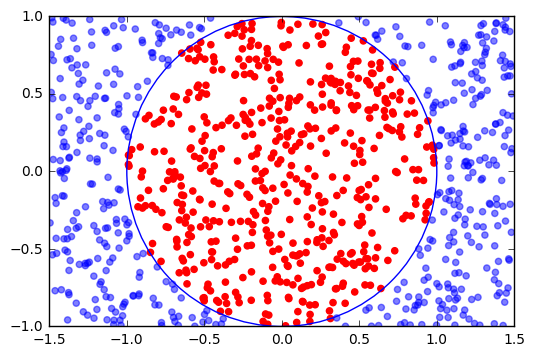

Value of pi (approximation): 3.1380


In [5]:
pi, points_list = monte_carlo_pi(1000,return_points=True)
plot_circle(points_list)
print("Value of pi (approximation): %.4f" % pi)

In [6]:
#Now, lets see how many points we need for a good estimation
max_points = 10000
step = 100
point_number = range(1, max_points,step)
estimated = [monte_carlo_pi(number) for number in point_number]
total_mean = sum(estimated)/ len(estimated)
point_number = range(1, 1000,10)
estimated = [monte_carlo_pi(number) for number in point_number]
total_mean = sum(estimated)/ len(estimated)

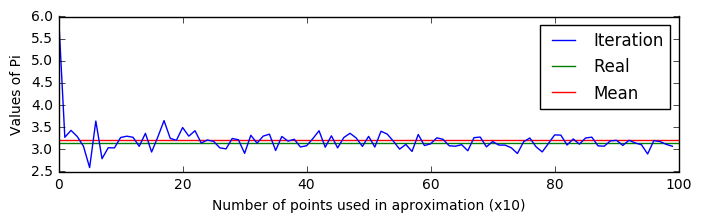

The approximated value of pi is 3.2008


In [7]:
plt.figure(figsize=(8, 2))
plt.hlines(math.pi, 0, 100, color='green')
plt.hlines(total_mean, 0, 100, color='red')
plt.plot(estimated)
plt.legend(["Iteration", "Real", "Mean"], loc="best")
plt.xlabel("Number of points used in aproximation (x10)")
plt.ylabel("Values of Pi")
plt.show()
print("The approximated value of pi is %.4f" % total_mean)

As we can see the approximation converges, if we take the mean, we can approximate the value of $\pi$.

Now, lets see if we can do the same using the circumference, it's length is $2r\pi$, we will try to use the same method, using the formula $\pi = \dfrac{P_{circ}A_{rectangle}}{2r}$.

In [8]:
#Let's define a function for approximating pi with a given number of points using the circumference
def monte_carlo_pi_circ(points, return_points=False):
    inside = 0
    point_list = []
    for i in range(points):
        x,y = (random.uniform(-1.5,1.5), random.uniform(-1,1))
        if (x**2+y**2)**(1/2) == 1:
            inside += 1
        if return_points:
            point_list.append((x,y))
    #The area of our rectangle is 6, since it goes from -1.5 to 1.5 and -1 to 1
    #But we need to divide by 2 times the radius which is 1
    pi = (inside/points) * 3
    if not return_points:
        return pi
    return (pi, point_list)

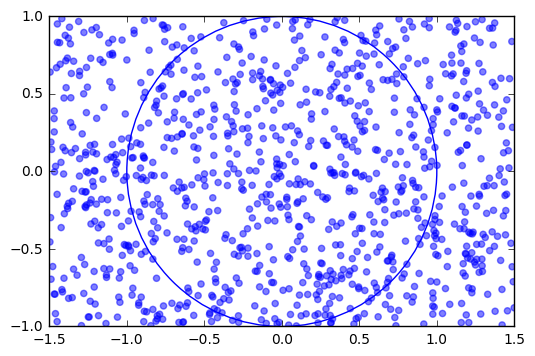

In [9]:
pi, points_list = monte_carlo_pi_circ(1000,return_points=True)
plot_circle(points_list, color_func=lambda x,y:(1,0,0) if (x**2+y**2)**(1/2) ==1 else (0,0,1,0.5))

Well, it's pretty hard for a point to fall exactly on the line, let's add a tolerance, to do this, we will consider a circular crown with a width of $w$, our new area will be then $\pi(a^2 - b^2)$ where $a = r+\frac{w}{2}$ and $b = r-\frac{w}{2}$, by doing some math (check down at the end of the notebook) we figure out the new formula $\pi = \frac{P_{crown}A_{rectangle}}{2rw}$, again, $P_{crown}$ is the probability of a point being within the circular crown.

In [10]:
#First, let's add a width parameter to our function
def monte_carlo_pi_circ(points, return_points=False, width = 0.1):
    inside = 0
    #We take half of the width in each side
    epsilon = width/2
    point_list = []
    for i in range(points):
        # We must add half the width for each side so we don't clip the poles of the annulus
        x,y = (random.uniform(-1.5,1.5), random.uniform(-1-epsilon,1+epsilon))
        #Check if it's within the annulus
        if 1-epsilon <= (x**2+y**2)**(1/2) <= 1+epsilon:
            inside += 1
        if return_points:
            point_list.append((x,y))
    #The area of our rectangle is 6, since it goes from -1.5 to 1.5 and -1 to 1
    #But we need to divide by 2 times the radius which is 1, and also, divide by the tolerance
    #print("Probability a point is inside the annulus: %.4f" % (inside/points))
    pi = (inside/points) * (2+w)*3/(2*w)
    if not return_points:
        return pi
    return (pi, point_list)

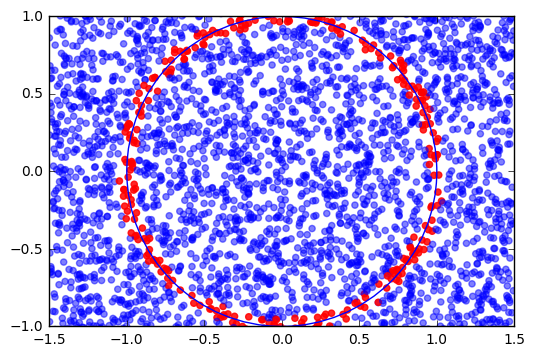

2.982


In [11]:
w = 0.1
pi, points_list = monte_carlo_pi_circ(3000,return_points=True, width=w)
plot_circle(points_list, color_func=lambda x,y:(1,0,0, 0.85) if 1-(w/2) <=(x**2+y**2)**(1/2) <= 1+(w/2) else (0,0,1,0.5))
print(pi)

In [12]:
max_points = 10000
step = 100
point_number = range(1, max_points,step)
estimated = [monte_carlo_pi_circ(number,width=w) for number in point_number]
total_mean = sum(estimated)/ len(estimated)

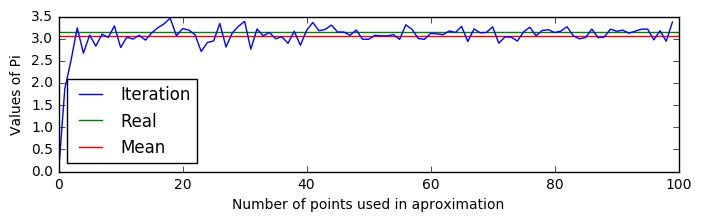

The approximated value of pi is 3.0553


In [13]:
plt.figure(figsize=(8, 2))
plt.hlines(math.pi, 0, max_points/step, color='green')
plt.hlines(total_mean, 0, max_points/step, color='red')
plt.plot(estimated)
plt.legend(["Iteration", "Real", "Mean"], loc="best")
plt.xlabel("Number of points used in aproximation")
plt.ylabel("Values of Pi")
plt.show()
print("The approximated value of pi is %.4f" % total_mean)

Again, we can see the approximation is close to the real value of pi.

## Math for circular crown monte carlo formula
The area of a circular crown is given by $$A_{crown} = \pi(a^2-b^2)$$ where $a$ is the external radius and $b$ is the internal radius, here $a=r+\epsilon$ and $b=r-\epsilon$ with $\epsilon$ being half the tolerance $w$ we choose, we can then calculate the probability of a point being within the crown as $$P_{crown} = \dfrac{A_{crown}}{A_{rectangle}}$$
Using some algebra tricks, we have $A_{crown} = \pi(a^2-b^2) \rightarrow A_{crown} = \pi(a-b)(a+b)$, since $a-b=2\epsilon$ then $A_{crown}=2\pi\epsilon(a+b)$ also $a+b=2r$ then $A_{crown}=4r\pi\epsilon$ changing $2\epsilon$ for $w$ we have $A_{crown}=2wr\pi\rightarrow A_{crown}=2rw\pi$